In [182]:
import numpy as np
from sklearn.neighbors import KernelDensity, DistanceMetric, BallTree

from matplotlib import pyplot as plt

In [39]:
def log_distance(x1, x2):
    return np.sqrt((np.log10(x1/x2)**2).sum())

In [240]:
x = np.random.uniform(-1, 1, 10000).reshape(-1, 1)

In [241]:
y = 2*x**2 + 1

In [242]:
lin_kde = KernelDensity(kernel='epanechnikov', bandwidth=0.05)

In [243]:
lin_kde.fit(x, sample_weight=y[:, 0])

KernelDensity(bandwidth=0.05, kernel='epanechnikov')

In [254]:
aux = lin_kde.score_samples(np.linspace(-1, 1, 52).reshape(-1, 1))

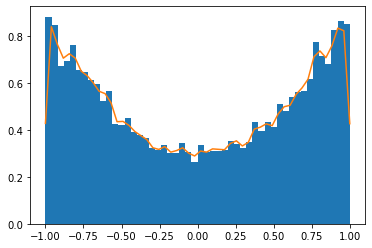

In [245]:
plt.hist(x, bins=50, weights=y, density=True)
plt.plot(np.linspace(-1, 1, 52), np.exp(aux))

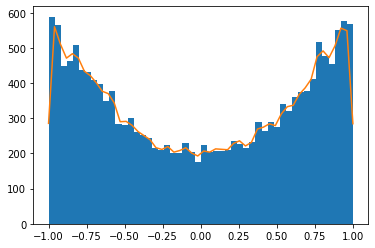

In [247]:
plt.hist(x, bins=50, weights=y, density=False)
plt.plot(np.linspace(-1, 1, 52), np.exp(aux)*y.sum()*2/50)

In [271]:
lin_ball = BallTree(x, leaf_size=40, metric='minkowski')

TypeError: __init__() got an unexpected keyword argument 'weight'

In [273]:
aux = lin_ball.kernel_density(np.linspace(-1, 1, 52).reshape(-1, 1), 0.1, kernel='epanechnikov', return_log=False)/len(x)

TypeError: kernel_density() got an unexpected keyword argument 'weights'

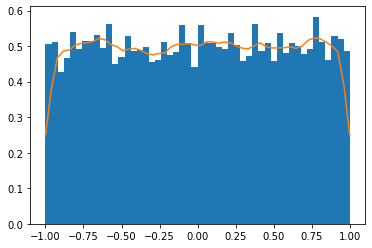

In [268]:
plt.hist(x, bins=50, density=True)
plt.plot(np.linspace(-1, 1, 52), aux)

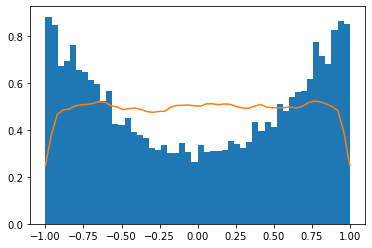

In [269]:
plt.hist(x, bins=50, weights=y, density=True)
plt.plot(np.linspace(-1, 1, 52), aux)

In [204]:
out = lin_ball.query_radius(np.linspace(-1, 1, 52).reshape(-1, 1), 0.1)

# Log

In [286]:
x = np.random.uniform(-1, 1, 10000).reshape(-1, 1)

In [287]:
y = 2*x**2 + 1

In [294]:
log_kde = KernelDensity(kernel='epanechnikov', bandwidth=0.05, algorithm='ball_tree', metric='pyfunc', metric_params={'func': log_distance})

In [295]:
jacobian = np.abs(x) * np.log(10)

In [296]:
log_kde.fit(x, sample_weight=(y/jacobian)[:, 0])

<ipython-input-39-35a01794d2d2>:2: RuntimeWarning: invalid value encountered in log10
  return np.sqrt((np.log10(x1/x2)**2).sum())


KernelDensity(algorithm='ball_tree', bandwidth=0.05, kernel='epanechnikov',
              metric='pyfunc',
              metric_params={'func': <function log_distance at 0x2ae547c0f790>})

In [300]:
aux = np.exp(log_kde.score_samples(np.linspace(-1, 1, 52).reshape(-1, 1)))

<ipython-input-39-35a01794d2d2>:2: RuntimeWarning: invalid value encountered in log10
  return np.sqrt((np.log10(x1/x2)**2).sum())


In [304]:
aux.mean()*2

0.11925896732536567

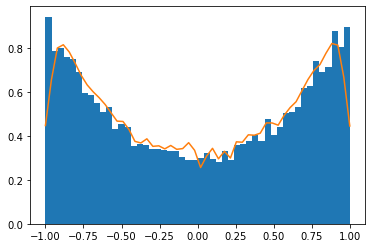

In [308]:
plt.hist(x, bins=50, weights=y, density=True)
plt.plot(np.linspace(-1, 1, 52), aux/aux.mean()/2)

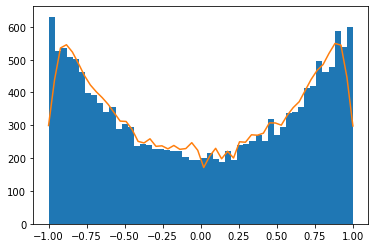

In [298]:
plt.hist(x, bins=50, weights=y, density=False)
plt.plot(np.linspace(-1, 1, 52), np.exp(aux)*y.sum()*2/50/(2*np.exp(aux).mean()))

In [276]:
x = np.random.uniform(-1, 1, 1000).reshape(-1, 2)

In [277]:
x.shape

(500, 2)

In [278]:
y = 2*x[:,0]**2 + x[:,1]**2

In [279]:
log_kde = KernelDensity(kernel='epanechnikov', bandwidth=0.1, metric='pyfunc', metric_params={'func': log_distance})

In [280]:
log_kde.fit(x, sample_weight=y)

<ipython-input-39-35a01794d2d2>:2: RuntimeWarning: invalid value encountered in log10
  return np.sqrt((np.log10(x1/x2)**2).sum())


KernelDensity(bandwidth=0.1, kernel='epanechnikov', metric='pyfunc',
              metric_params={'func': <function log_distance at 0x2ae547c0f790>})

In [281]:
aux = log_kde.score_samples(np.array([0.05, 0.08]).reshape(1, 2))

<ipython-input-39-35a01794d2d2>:2: RuntimeWarning: invalid value encountered in log10
  return np.sqrt((np.log10(x1/x2)**2).sum())


In [282]:
aux

array([-33.51774834])

In [191]:
np.exp(np.array([8.56653947, 8.55549578]))

array([5252.92041264, 5195.22794324])